<a href="https://colab.research.google.com/github/Prasad-Khedkar/Global-Terrorism-EDA/blob/main/Global_Terrorism(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Essential Libraries

In [1]:
import numpy as np                        ## Linear Algebra
import pandas as pd                       ## Framing data
import matplotlib.pyplot as plt           ## Visualization
import seaborn as sns                     ## Visualization
import warnings
warnings.filterwarnings('ignore')         ## To ignore warning messages
sns.set(style="darkgrid")                 ## setting dark themed grid for seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Projects/EDA-Global Terrorism/Data/'

### Data-Loading

In [4]:
df = pd.read_csv(path + 'Global Terrorism Data.csv',encoding='latin-1')             ## Loading the Data-set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
pd.set_option('display.max_columns', 500)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [7]:
print(list(df.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [8]:

## Renaming the Columns and Selecting Relevant Columns for our data-set

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City','region_txt':'Region','provstate':'Province','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','target1':'Target_Name','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_Name','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)
df = df[['Year','Month','Day','City','Province','Country','Region','Attack_Type','Target_Type','Killed','Wounded','Group_Name','Weapon_Type']]

In [9]:
df.head()

,Year,Month,Day,City,Province,Country,Region,Attack_Type,Target_Type,Killed,Wounded,Group_Name,Weapon_Type
0,1970,7,2,Santo Domingo,NaN,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,MANO-D,Unknown
1,1970,0,0,Mexico city,Federal,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League,Unknown
2,1970,1,0,Unknown,Tarlac,Philippines,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,Unknown,Unknown
3,1970,1,0,Athens,Attica,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown,Explosives
4,1970,1,0,Fukouka,Fukouka,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown,Incendiary


In [10]:
df.shape

(181691, 13)

## Data-Cleaning

In [11]:
df.drop_duplicates(keep='first',inplace=True)      ## Dropping duplicate values if any


In [12]:
df.shape                                           ## To see total rows and columns after dropping duplicates
                                                   ## 13817 duplicates

(167545, 13)

In [13]:
df.describe()                                      ## Describing Numerical Attributes

,Year,Month,Day,Killed,Wounded
count,167545.000000,167545.000000,167545.000000,158519.000000,152797.000000
mean,2003.128264,6.469343,15.524325,2.556324,3.373607
std,13.145833,3.391079,8.814090,11.967369,37.370935
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [14]:
df.isnull().sum()                  ## Null Value Counts in each column

Year               0
Month              0
Day                0
City             422
Province         421
Country            0
Region             0
Attack_Type        0
Target_Type        0
Killed          9026
Wounded        14748
Group_Name         0
Weapon_Type        0
dtype: int64

In [15]:
df['City'].fillna('Unknown',inplace=True)          ## Filling NaN categorical values with 'Unknown'
df['Province'].fillna('Unknown',inplace=True)

In [16]:
km=df['Killed'].mean()
df['Killed'].fillna(km,inplace=True)                ## Filling null numerical values with mean value of the column

wm=df['Wounded'].mean()
df['Wounded'].fillna(wm,inplace=True)

In [17]:
df.isnull().sum()                                   ## Re-checking if null values present

Year           0
Month          0
Day            0
City           0
Province       0
Country        0
Region         0
Attack_Type    0
Target_Type    0
Killed         0
Wounded        0
Group_Name     0
Weapon_Type    0
dtype: int64

### Total no. of People Wounded and Killed

In [18]:
TW=str(int(df['Wounded'].sum()))
TK=str(int(df['Killed'].sum()))
print('Total no. of People Wounded ' + TW)
print('Total no. of People Killed ' + TK)

Total no. of People Wounded 565230
Total no. of People Killed 428299


### Year-Wise Analysis

In [19]:
df['Year'].value_counts()[:10]

2014    15977
2015    14143
2016    12582
2013    11536
2017    10447
2012     8225
2011     4900
2008     4664
2010     4659
2009     4636
Name: Year, dtype: int64

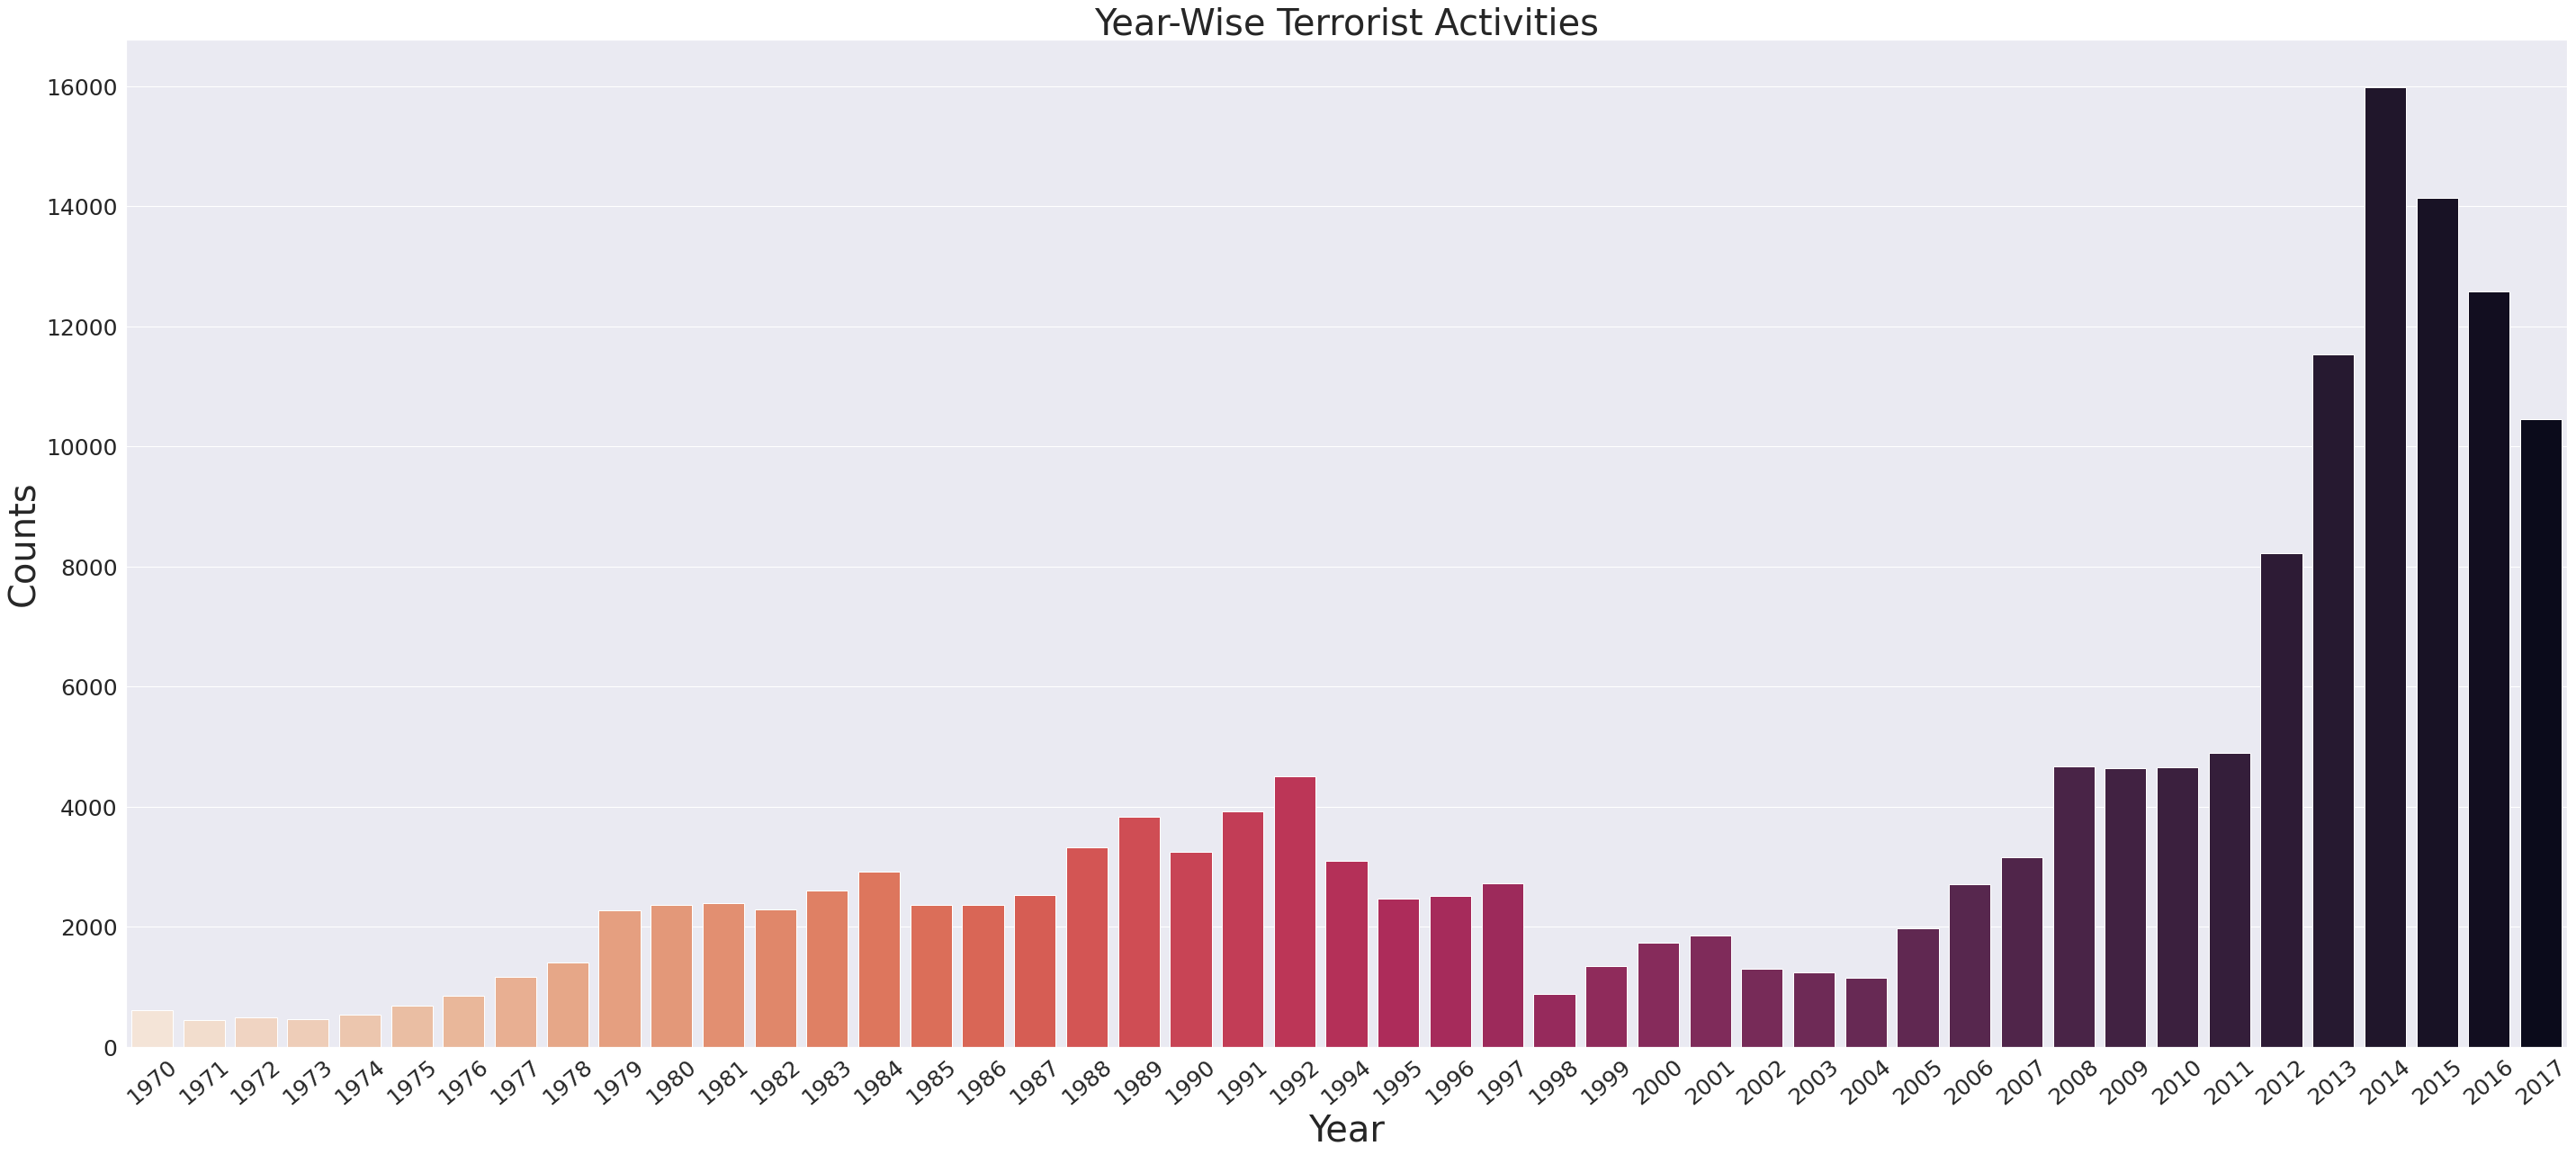

In [20]:
plt.figure(figsize=(40,18))
sns.countplot(x=df["Year"],palette='rocket_r')
plt.xticks(size=25,rotation =40)
plt.yticks(size=25)
plt.xlabel('Year',fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Year-Wise Terrorist Activities',fontsize=40)
plt.tight_layout()
plt.show()

### Attack-Type Analysis

In [21]:
df0=df['Attack_Type'].value_counts()
df0.drop(['Unknown'], inplace=True)
df0

Bombing/Explosion                      79098
Armed Assault                          40902
Assassination                          18629
Hostage Taking (Kidnapping)            10837
Facility/Infrastructure Attack          8797
Hostage Taking (Barricade Incident)      913
Unarmed Assault                          912
Hijacking                                649
Name: Attack_Type, dtype: int64

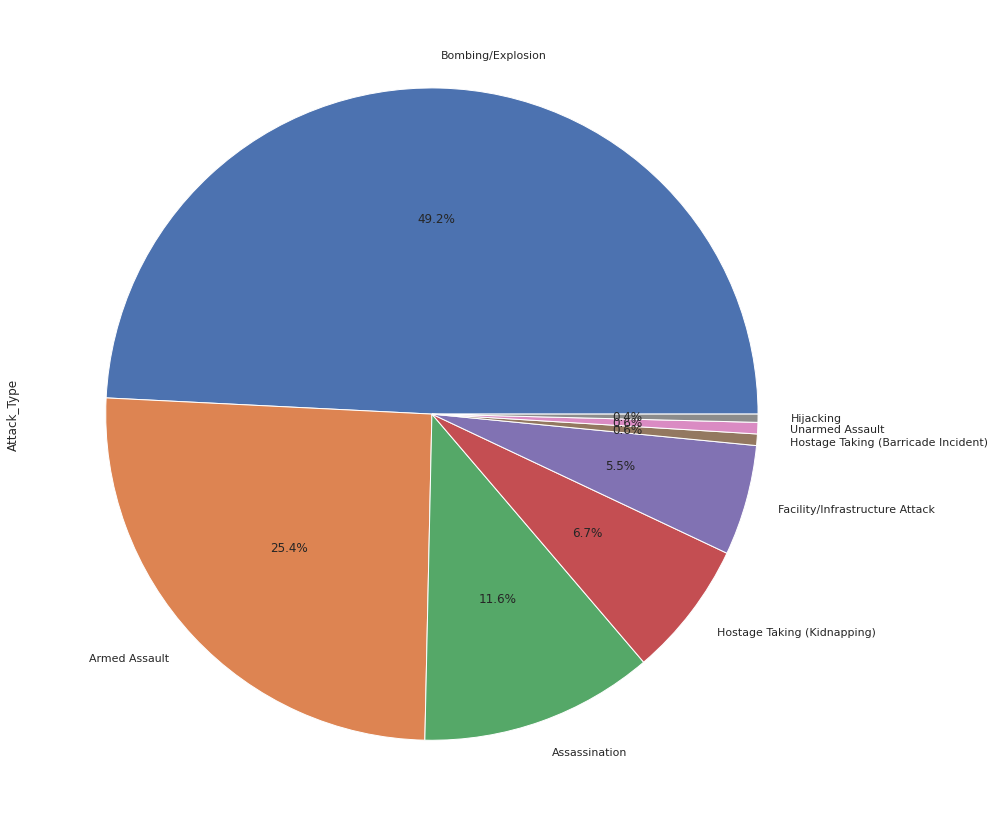

In [22]:
df0.plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.show()

## Target-Type Analysis

In [23]:
df['Target_Type'].value_counts()

Private Citizens & Property       40464
Military                          27240
Police                            23519
Government (General)              19893
Business                          17753
Transportation                     5986
Unknown                            5025
Religious Figures/Institutions     4181
Educational Institution            3997
Utilities                          3952
Government (Diplomatic)            3405
Terrorists/Non-State Militia       2977
Journalists & Media                2816
Violent Political Party            1770
Airports & Aircraft                1303
NGO                                 948
Telecommunication                   886
Tourists                            424
Maritime                            337
Food or Water Supply                294
Abortion Related                    244
Other                               131
Name: Target_Type, dtype: int64

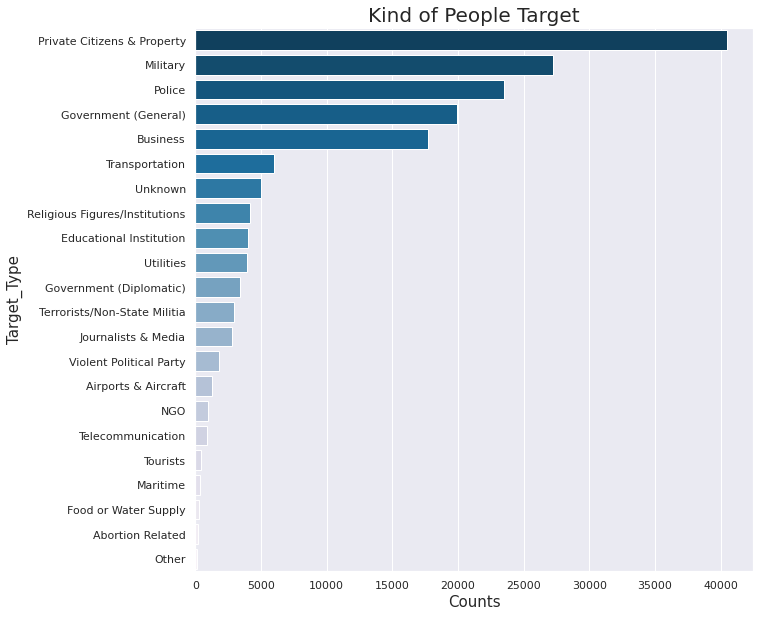

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Target_Type'].value_counts(),y=df['Target_Type'].value_counts().index,palette='PuBu_r')
plt.xlabel('Counts',fontsize=15)
plt.ylabel('Target_Type',fontsize=15)
plt.title('Kind of People Target',fontsize=20)
plt.show()

## Weapon-Type Analysis

In [25]:
dfn=df['Weapon_Type'].value_counts()
dfn.drop('Unknown',inplace=True)
dfn


Explosives                                                                     83240
Firearms                                                                       56771
Incendiary                                                                      9013
Melee                                                                           3510
Chemical                                                                         308
Sabotage Equipment                                                               135
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      135
Other                                                                            110
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                                       7
Name: Weapon_Type, dtype: int64

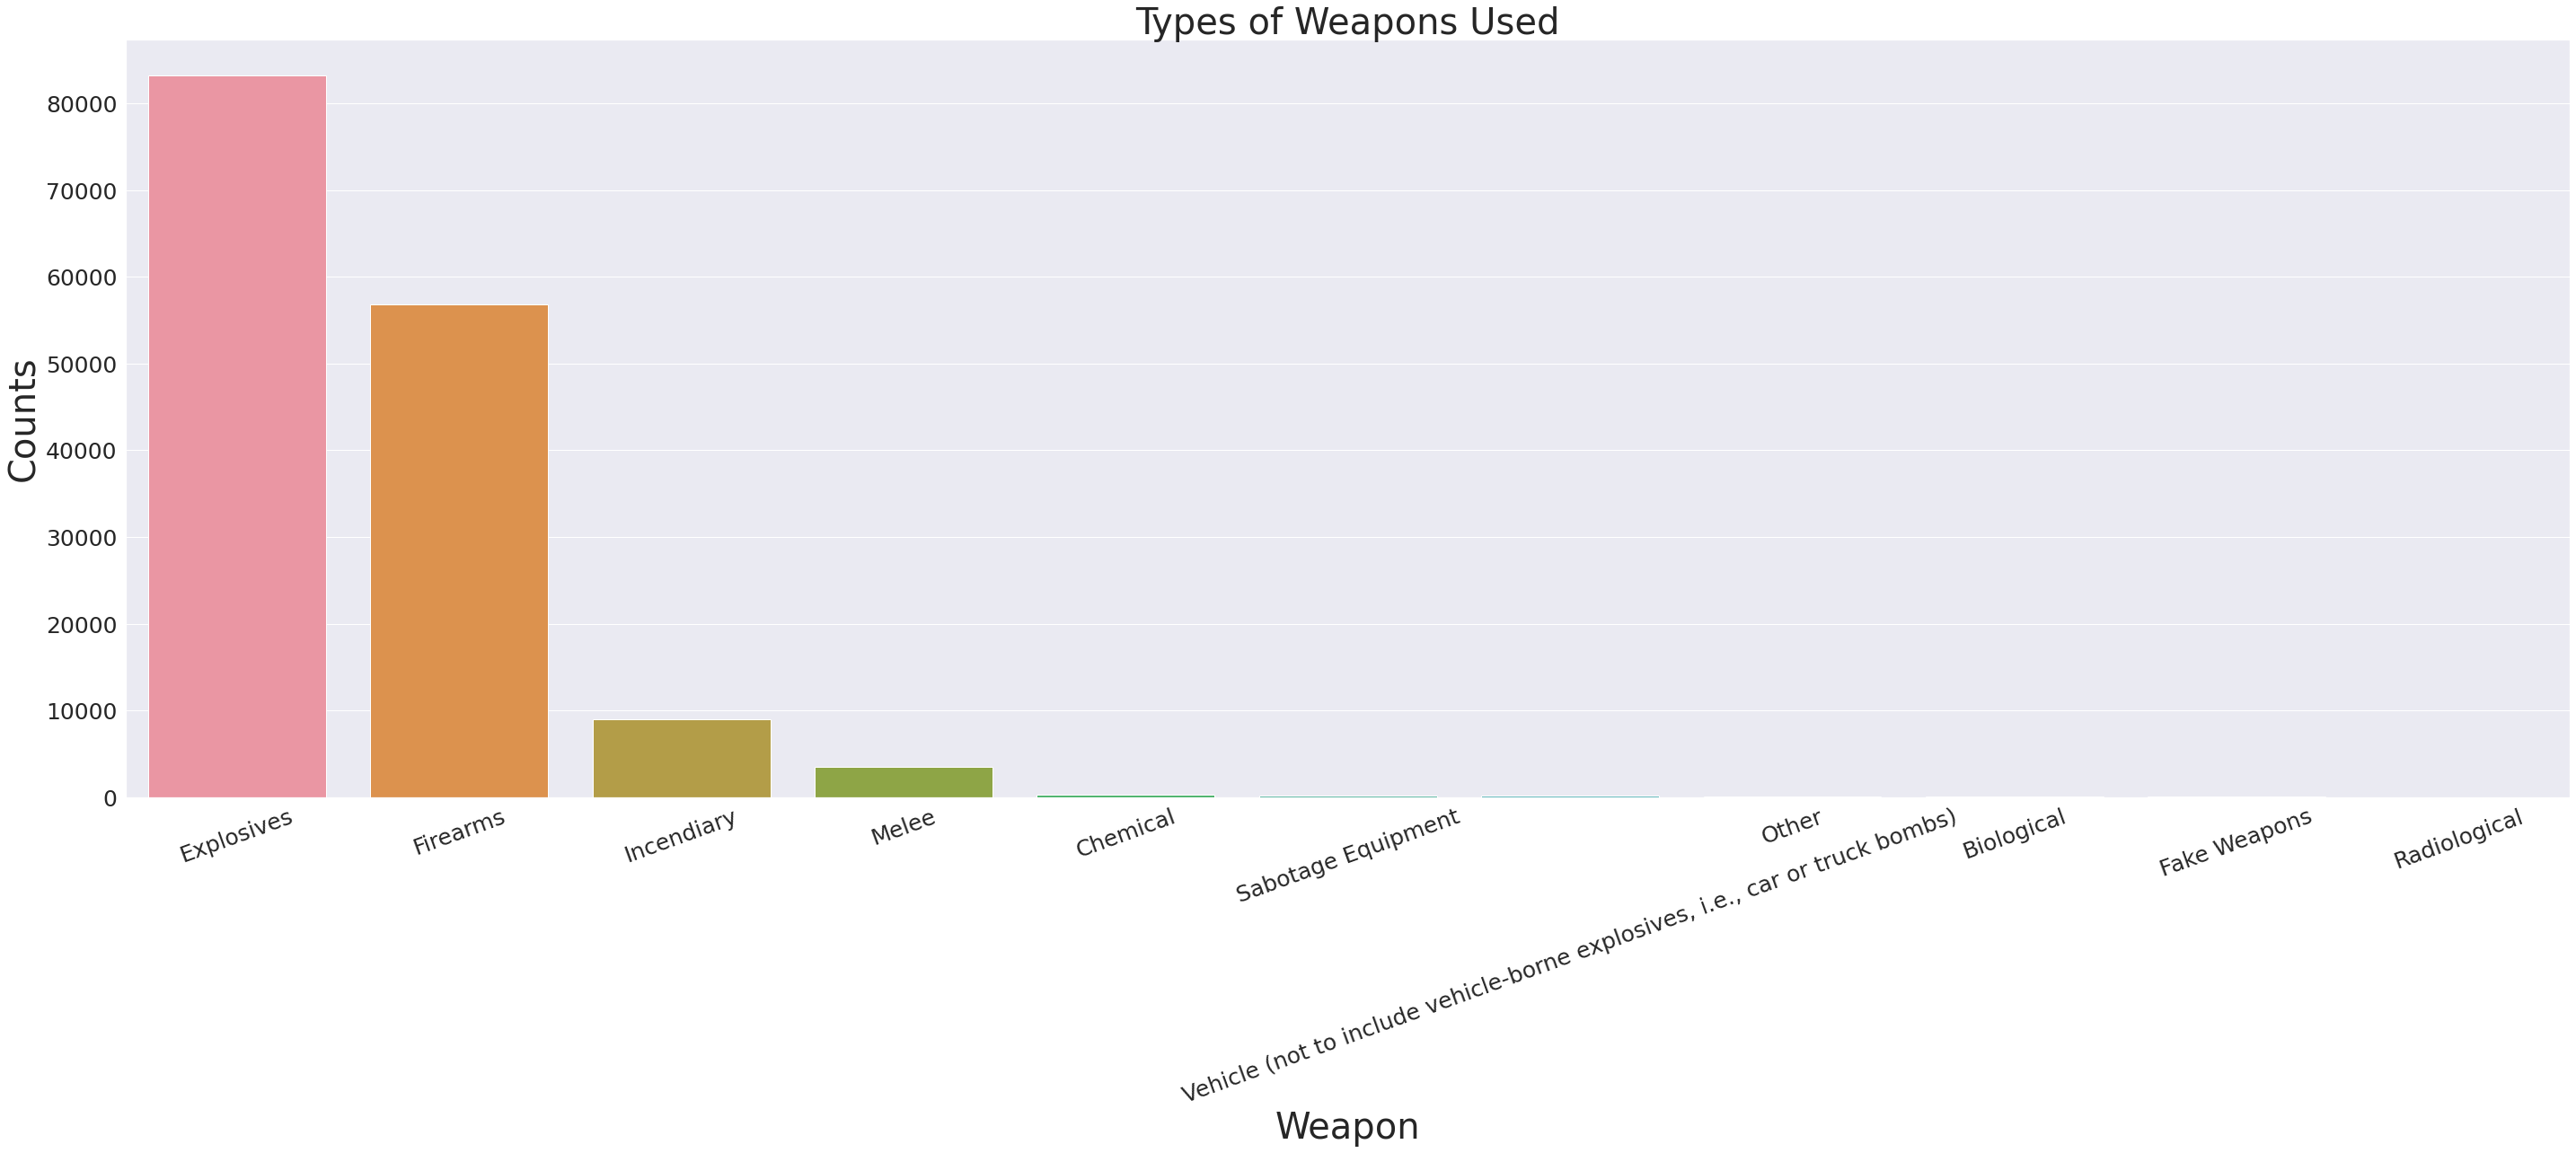

In [26]:
plt.figure(figsize=(40,18))
sns.barplot(x=dfn.index,y=dfn)
plt.xticks(size=25,rotation = 20)
plt.yticks(size=25)
plt.xlabel("Weapon",fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Types of Weapons Used',fontsize=40)
plt.tight_layout()
plt.show()

## Regions Affected

In [27]:
df['Region'].value_counts()

Middle East & North Africa     47444
South Asia                     42811
Sub-Saharan Africa             16760
South America                  15792
Western Europe                 14540
Southeast Asia                 11804
Central America & Caribbean     8771
Eastern Europe                  4932
North America                   3192
East Asia                        680
Central Asia                     549
Australasia & Oceania            270
Name: Region, dtype: int64

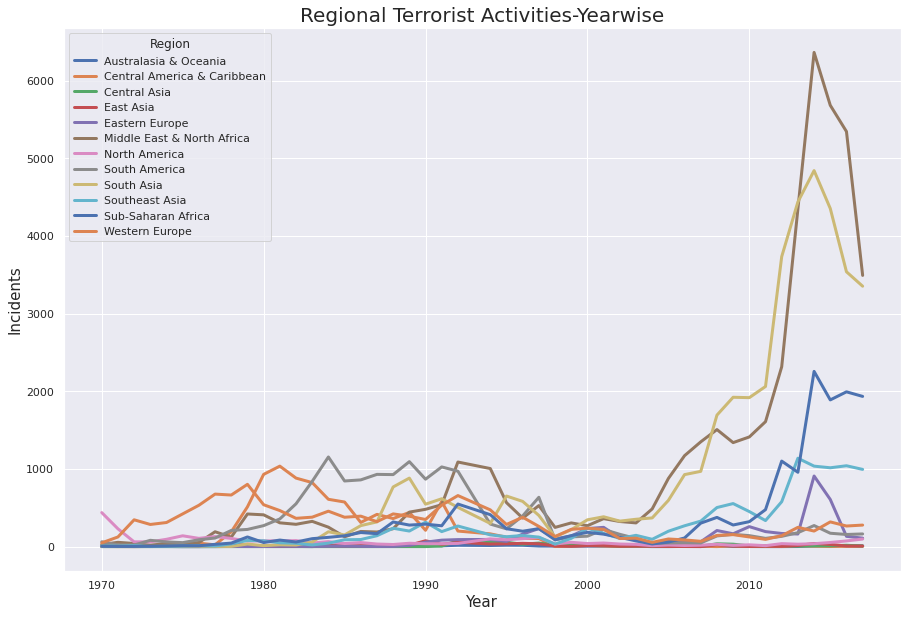

In [28]:
pd.crosstab(df.Year,df.Region).plot(kind='line',figsize=(15,10),linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Incidents',fontsize=15)
plt.title('Regional Terrorist Activities-Yearwise',fontsize=20)
plt.show()

## Group-Wise Analysis

### Top 20 Terrorist Organisations

In [29]:
df1=df['Group_Name'].value_counts()[1:21]
df1

Taliban                                             7216
Islamic State of Iraq and the Levant (ISIL)         4997
Shining Path (SL)                                   3547
Al-Shabaab                                          3190
New People's Army (NPA)                             2679
Farabundo Marti National Liberation Front (FMLN)    2440
Irish Republican Army (IRA)                         2362
Revolutionary Armed Forces of Colombia (FARC)       2332
Boko Haram                                          2296
Kurdistan Workers' Party (PKK)                      2199
Basque Fatherland and Freedom (ETA)                 1833
Communist Party of India - Maoist (CPI-Maoist)      1829
Maoists                                             1590
Liberation Tigers of Tamil Eelam (LTTE)             1566
National Liberation Army of Colombia (ELN)          1371
Tehrik-i-Taliban Pakistan (TTP)                     1308
Palestinians                                        1097
Al-Qaida in the Arabian Peninsu

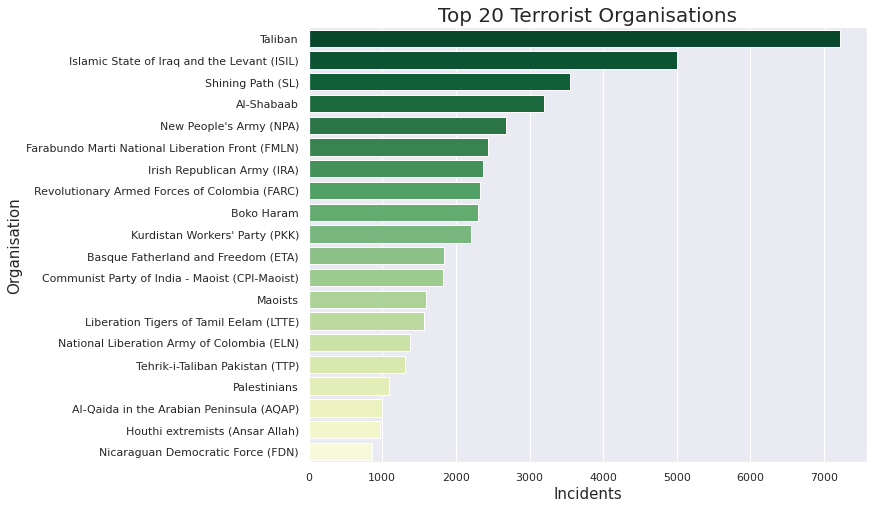

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df1, y=df1.index,palette=('YlGn_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Organisation',fontsize=15)
plt.title('Top 20 Terrorist Organisations',fontsize=20)
plt.show()

## Top 20 Countries Affected

In [31]:
df2 = df['Country'].value_counts()[:20]
df2

Iraq              22866
Pakistan          13504
Afghanistan       12387
India             11415
Colombia           7291
Philippines        6691
United Kingdom     4822
Peru               4736
El Salvador        4134
Somalia            4044
Turkey             3947
Nigeria            3715
Thailand           3590
Yemen              3201
Spain              2950
Sri Lanka          2891
Algeria            2713
United States      2628
Lebanon            2405
Egypt              2354
Name: Country, dtype: int64

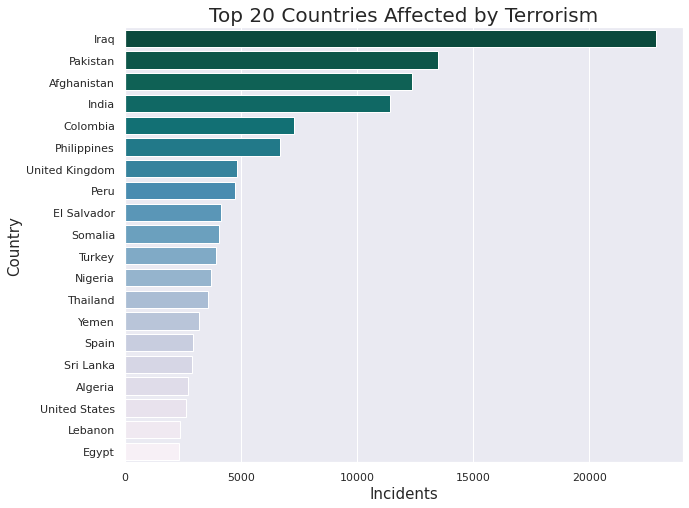

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df2, y=df2.index,palette=('PuBuGn_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('Top 20 Countries Affected by Terrorism',fontsize=20)
plt.show()

## Top 20 Affected Cities

In [33]:
df3=df['City'].value_counts()[1:21]
df3

Baghdad           7326
Karachi           2112
Mosul             2028
Belfast           1927
Lima              1526
Mogadishu         1521
Santiago          1199
San Salvador      1130
Kirkuk             903
Beirut             890
Istanbul           840
Bogota             801
Athens             800
Benghazi           790
Quetta             789
Peshawar           784
Baqubah            725
Kabul              718
Guatemala City     654
Jerusalem          604
Name: City, dtype: int64

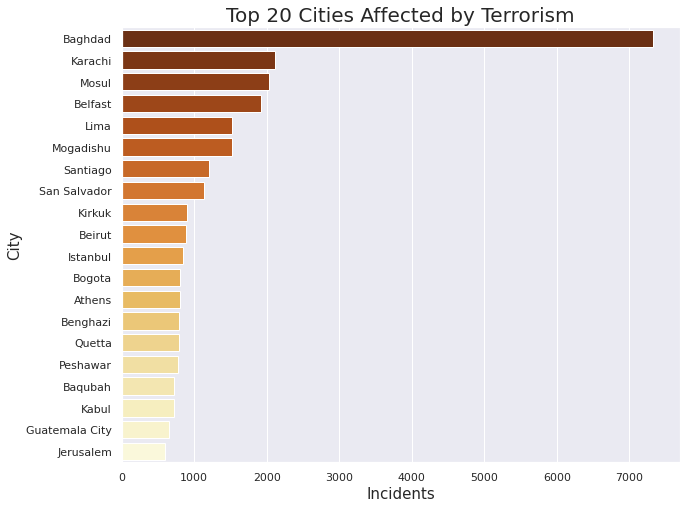

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df3, y=df3.index,palette=('YlOrBr_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top 20 Cities Affected by Terrorism',fontsize=20)
plt.show()

## Top 20 Affected Provinces

In [35]:
df4=df['Province'].value_counts()[:22]
df4.drop(['Unknown','Baghdad'], inplace=True)
df4

Northern Ireland                       4168
Balochistan                            3625
Saladin                                3094
Khyber Pakhtunkhwa                     2992
Nineveh                                2931
Diyala                                 2857
Al Anbar                               2788
Sindh                                  2627
Jammu and Kashmir                      2327
Federally Administered Tribal Areas    2315
Lima                                   1747
Punjab                                 1681
West Bank                              1559
Banaadir                               1553
Kirkuk                                 1552
Antioquia                              1486
San Salvador                           1450
Borno                                  1358
Basque Country                         1324
Eastern                                1272
Name: Province, dtype: int64

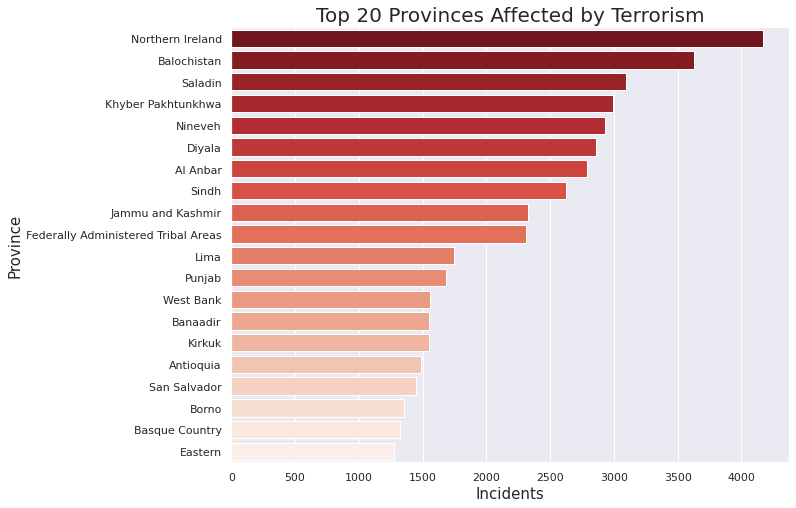

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df4, y=df4.index,palette=('Reds_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Province',fontsize=15)
plt.title('Top 20 Provinces Affected by Terrorism',fontsize=20)
plt.show()

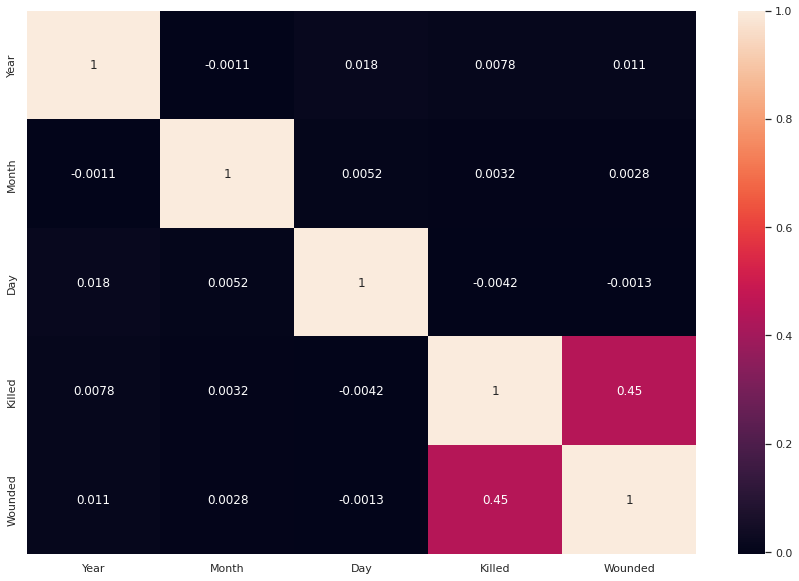

In [37]:
plt.figure(figsize=(15,10))
numerical_data = df.select_dtypes(exclude=[object])
heat=numerical_data.corr()
sns.heatmap(heat,annot=True)

In [38]:
df['Killed'].value_counts().sum()

167545

##    Insights drawn from above EDA

* 4.2 lakh People died and more than 5.5 lakh got wounded during 1970-2017 due to Terrorism 
* Most terrorist activities happened during 2013-17, especially in the year 2014 (Total no. of attacks 16048)       
* Iraq is the most affected Country (Total no. of attacks 22866)     
* Baghdad is the most affected city (Total no. of attacks 7326)     
* Northern Ireland is the most affected Province.      
* Middle-East is the most affected Region.        
* Private-Citizens and Property(40541 targeted) and Millitary(27272 targeted) are the kind of people mostly targeted during attacks.
                 
* Explosives(83421 incidents)  and Firearms(56830 incidents) are mostly used during attacks.
* Bombing is the most frequently used method of an attack(79275 times)
* Taliban and ISIL are the top Terrorist Organisations                 
  (Responsible for total 7216 and 4997 no. of attacks respectively.)





